In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.shape

(400, 5)

In [6]:
len(df[df.Purchased == 0]), len(df[df.Purchased == 1])

(257, 143)

In [7]:
(len(df[df.Purchased == 0]))/len(df)

0.6425

In [8]:
len(df['User ID'].unique())

400

In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [11]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
q3 = df.Age.quantile(0.75)
q1 = df.Age.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(5.375, 70.375)

In [13]:
q3 = df.EstimatedSalary.quantile(0.75)
q1 = df.EstimatedSalary.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-24500.0, 155500.0)

In [14]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [15]:
df.Gender = df.Gender.map({'Male' : 1, 'Female' : 0})
df.drop(['User ID'], axis = 1, inplace = True)
df = df.drop_duplicates()

In [16]:
df.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [17]:
df.shape

(380, 4)

In [18]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

**Splitting the dataset into the Training set and Test set**

In [19]:
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 786)

**Feature Scaling**

In [20]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_roc_curve, confusion_matrix

rf = RandomForestClassifier(n_estimators = 100, max_depth = 2, max_features = 'sqrt')

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='sqrt')

**Predicting the Test set results**

Accuracy Score :  0.9035087719298246
F1 Score :  0.8764044943820224
AUROC Score :  0.8945012787723785


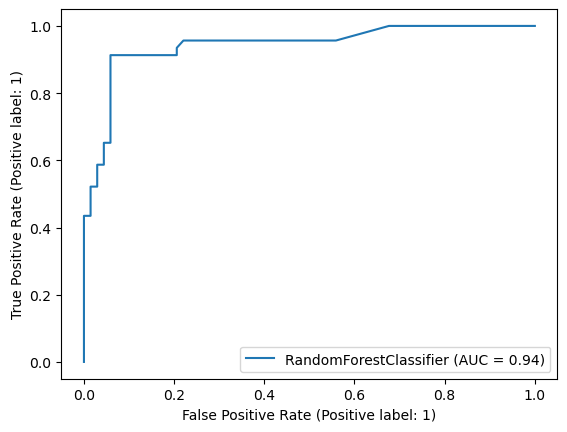

In [22]:
y_predict = rf.predict(X_test)
print('Accuracy Score : ', accuracy_score(y_test, y_predict))
print('F1 Score : ', f1_score(y_test, y_predict))
print('AUROC Score : ', roc_auc_score(y_test, y_predict))
plot_roc_curve(rf, X_test, y_test)

In [23]:
importances = rf.feature_importances_

In [24]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
feature_importances

[('Gender', 0.01), ('Age', 0.55), ('EstimatedSalary', 0.44)]

**Making the Confusion Matrix**

In [25]:
confusion_matrix(y_test, y_predict)

array([[64,  4],
       [ 7, 39]], dtype=int64)

**Visualising the Training set results**

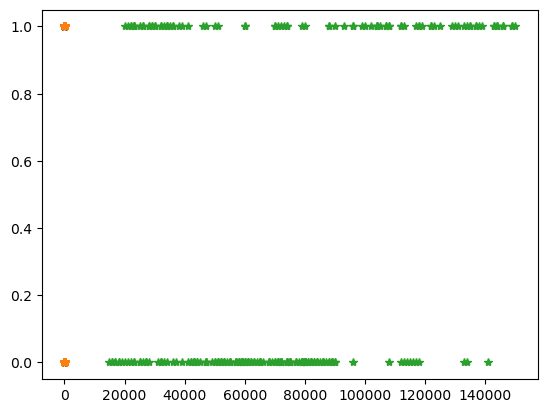

In [26]:
plt.plot(X_train,y_train, '*')

**Visualising the Test set results**

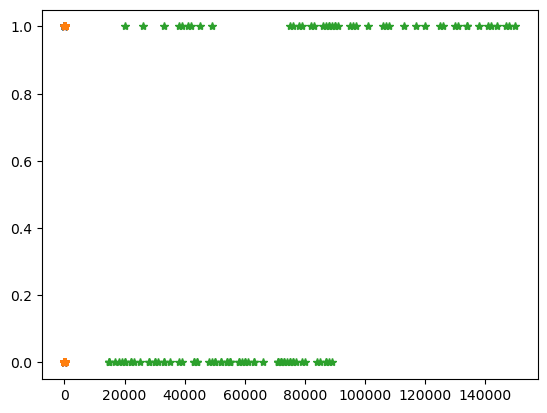

In [27]:
plt.plot(X_test,y_test, '*')